In [1]:
from __future__ import division

import collections
import numpy as np
import matplotlib.pyplot as plt

## NN libs
import keras
from keras import backend as K
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.callbacks import TensorBoard

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, setup, compression, ncd_evaluation
import midi
import midi.decode
from midi import generators as g
from utils import io, models_io, utils, plot, string
from capsule.layers import Capsule, Length
from capsule.capsulefunctions import squash, softmax, margin_loss

In [4]:
context = setup.init(max_bars=4)
c = context

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_timestesp = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]

Setting up params

max min f 20.0 0.25
 >> Context(max_t=4.0, dt=0.025, n_timesteps=160, note_length=0.3, bpm=120.0, tempo=500000, ticks_per_beat=480)
 sample length:  160.000000
 max_f: 20.000000, min_f: 0.250000


In [5]:
n = 500 * 1
dim4 = True
multiTrack = True
reduce_dims = midi.ReduceDimsOptions.NONE # GLOBAL
dn = 'drum_midi/'
v = None # float | None
x_train, labels = setup.import_data(context, n, dim4=dim4, reduce_dims=reduce_dims, 
    dirname=dn, multiTrack=multiTrack, velocity=v, r=True)


Importing midi-data
walk_and_search(../datasets/drum_midi/)
path ../datasets/drum_midi/
path ../datasets/drum_midi/50´s Drummer MIDI Files
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM
  01 8th Hat.mid
  02 8th Ride.mid
  03 16th Snare.mid
  04 8th Ride.mid
  05 16th Ride.mid
  06 16th Ride.mid
  07 16th Ride.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM
  01 8th Hat.mid
  02 8th Snare.mid
  03 4th Snare .mid
  04 8th Ride.mid
  05 8th Snare.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/03 Lips n Hips 152BPM
  01 8th Perc.mid
  02 8th Ride.mid
  03 8th Ride .mid
  04 8th Snare.mid
  05 8th Snare.mid
  06 8th Hat.mid
  07 8th Snare.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/04 Maybelline 233BPM
  01 8th Snare.mid
  02 8th Cym.mid
  03 8th Ride.mid
  04 16t

  06 8th Cym.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/07 Rock Keeler 133BPM
  01 8th Hat.mid
  02 4th Hat.mid
  03 8th Toms.mid
  04 8th Perc.mid
  05 8th Hat.mid
  06 8th Cym.mid
  07 4th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/08 Bouncer 162BPM
  01 8th Cym.mid
  02 8th Hat.mid
  03 4th Hat.mid
  04 8th Cym.mid
  05 8th Hat.mid
  06 8th Hat.mid
  07 8th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/09 Slow Shuffle 80BPM
  01 4th Toms.mid
  02 16th Hat.mid
  03 16th Hat.mid
  04 16th Cym.mid
  05 8th Toms.mid
  06 8th Toms.mid
  07 16th Cym.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/10 Chilled 120BPM
  01 8th Cym.mid
  02 8th Hat.mid
  03 8th Cym.mid
  04 8th Hat.mid
  05 16th Hat.mid
  06 8th Toms.mid
  07 8th Toms.mid
path ../datasets/drum_midi/50´s Drummer MIDI Files/07 Indie/11 Disco Dancer 135BPM
  01 4th Hat .mid
  02 8th Hat.mid
  03 8th Hat.mid
  04 16th Hat.mid
  05 

In [6]:
genres = [string.extract_labels_from_filename(k) for k in labels]
# genre_dict = setup.build_label_dict(genres)

In [7]:
[(i,k) for i,k in enumerate(labels)]

[(0,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/01 8th Hat.mid"),
 (1,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/02 8th Ride.mid"),
 (2,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/03 16th Snare.mid"),
 (3,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/04 8th Ride.mid"),
 (4,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/05 16th Ride.mid"),
 (5,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/06 16th Ride.mid"),
 (6,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/01 Dancin Rick 166BPM/07 16th Ride.mid"),
 (7,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/01 8th Hat.mid"),
 (8,
  "../datasets/drum_midi/50´s Drummer MIDI Files/01 Rock'n'Roll/02 Gogo 191BPM/02 8th Snare.mid"),
 (9,
  "../datasets/

In [8]:
unique_genres = set(genre[-1] for genre in genres)
len(unique_genres)

72

In [9]:
x_train.shape

(500, 160, 10, 1)

In [10]:
# genres = [string.extract_labels_from_filename(k) for k in labels]
genre_dict = setup.build_label_dict(genres)

In [11]:
input_shape = x_train[0].shape
timesteps = input_shape[0]
notes = input_shape[1]
input_shape

(160, 10, 1)

In [12]:
latent_dim = 10
epsilon_std = 1.0
batch_size = 128
epochs = 500

name = 'non-functional_model.h5'
fn = config.model_dir + name

In [13]:
vae, encoder, generator = models.build(input_shape, latent_dim)
vae.load_weights(fn)

/usr/local/lib/python3.6/site-packages/keras/layers/core.py:642: UserWarning: `output_shape` argument not specified for layer lambda_2 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `[(None, 10), (None, 10)]` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))
/Users/mark/src/pattern-recognition/src/models.py:147: UserWarning: Output "decoder_model-" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "decoder_model-" during training.
  vae.compile(optimizer='adam')


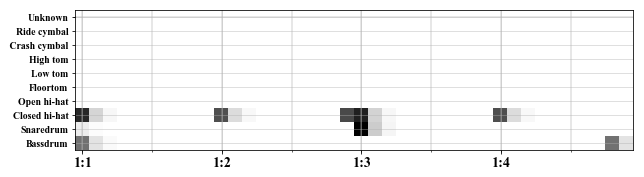

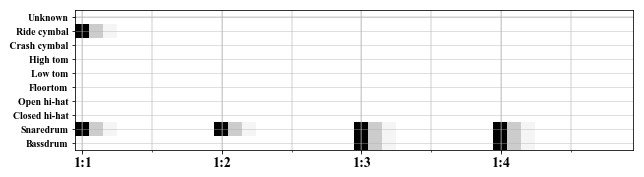

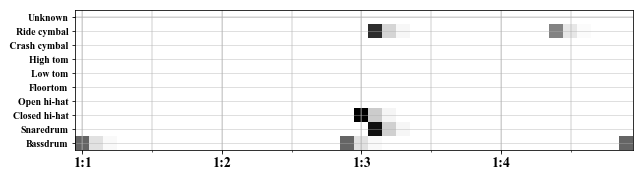

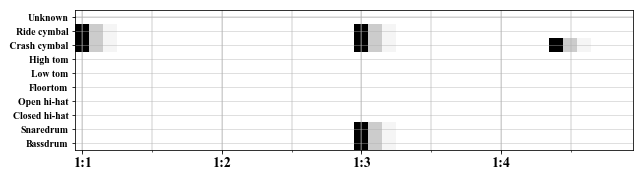

In [14]:
# utils.reload(plot)
i,j = 0, 10
m = 40
y = midi.decode.identity(c, vae.predict(x_train[:500]))
plot.single(x_train[i,:m])
plot.single(y[i,:m])
plot.single(x_train[j,:m])
plot.single(y[j,:m])

## Style transfer

In [15]:
m = 500
x_train_encoded = encoder.predict(x_train[:m], batch_size=batch_size)
x_train_encoded.shape

(500, 10)

In [16]:
x_train.shape

(500, 160, 10, 1)

In [17]:
fn = config.plots_dir + 'transformations-best_dims.pkl'
best_dims = io.load(fn)
fn = config.plots_dir + 'transformations.pkl'
transformations = io.load(fn)
fn = config.plots_dir + 'min_transformations.pkl'
min_transformations = io.load(fn)

In [18]:
list(transformations.keys())[:]

['04 Country/01 Calvin 148BPM',
 "01 Rock'n'Roll/07 Thwag 170BPM",
 '03 Traditional Pop/07 Lester Lee 133BPM',
 "01 Rock'n'Roll/08 Doowoop 140bpm",
 '07 Indie/08 Bouncer 162BPM',
 "01 Rock'n'Roll/10 Ottis 172bpm",
 '07 Indie/01 Rock Shuffle 130BPM',
 '03 Traditional Pop/01 Fly High 115BPM',
 '03 Traditional Pop/10 Frewild 152BPM',
 '07 Indie/06 Swing Funk 102BPM',
 '05 Jazz/02 Another You 170BPM',
 '06 Soul - Funk/10 Syncopated Ride 128BPM',
 '07 Indie/09 Slow Shuffle 80BPM',
 '06 Soul - Funk/03 Cadence Soul 105BPM',
 '05 Jazz/04 Silent Tear 234BPM',
 "01 Rock'n'Roll/05 Straight Line 136BPM",
 '03 Traditional Pop/08 Cecil Cee 101BPM',
 '06 Soul - Funk/09 Smooth Soul 81BPM',
 '04 Country/08 Eddie Ed 111BPM',
 '07 Indie/11 Disco Dancer 135BPM',
 "01 Rock'n'Roll/03 Lips n Hips 152BPM",
 '06 Soul - Funk/02 Boogaloo 120BPM',
 '02 Blues/01 Booze 92BPM',
 '06 Soul - Funk/07 Ride Swing 95Bpm',
 "01 Rock'n'Roll/09 Diddeley 185bpm",
 "01 Rock'n'Roll/01 Dancin Rick 166BPM",
 '03 Traditional Pop/0

In [19]:
len(transformations.keys())

71

In [20]:
utils.reload(ncd_evaluation)
grid = [0, 0.01, 0.1, 0.5, 1]
db, x_result, meta = ncd_evaluation.transform(x_train_encoded, genre_dict, min_transformations, 
                generator, grid, amt1=100, amt2=1, v=1)

04 Country/01 Calvin 148BPM 	-> 03 Traditional Pop/09 Distel 155BPM
01 Rock'n'Roll/07 Thwag 170BPM 	-> 06 Soul - Funk/01 Soul Groove 107BPM
03 Traditional Pop/07 Lester Lee 133BPM 	-> 07 Indie/06 Swing Funk 102BPM
01 Rock'n'Roll/08 Doowoop 140bpm 	-> 06 Soul - Funk/03 Cadence Soul 105BPM
07 Indie/08 Bouncer 162BPM 	-> 03 Traditional Pop/06 Bopop 130MPM
01 Rock'n'Roll/10 Ottis 172bpm 	-> 04 Country/09 Broonze 122BPM
07 Indie/01 Rock Shuffle 130BPM 	-> 06 Soul - Funk/03 Cadence Soul 105BPM
03 Traditional Pop/01 Fly High 115BPM 	-> 01 Rock'n'Roll/10 Ottis 172bpm
03 Traditional Pop/10 Frewild 152BPM 	-> 04 Country/07 Trainy 100BPM
07 Indie/06 Swing Funk 102BPM 	-> 05 Jazz/01 Amel 85BPM Brushes
05 Jazz/02 Another You 170BPM 	-> 04 Country/02 Marching 94BPM
06 Soul - Funk/10 Syncopated Ride 128BPM 	-> 02 Blues/02 Nappy Brown 160BPM
07 Indie/09 Slow Shuffle 80BPM 	-> 01 Rock'n'Roll/10 Ottis 172bpm
06 Soul - Funk/03 Cadence Soul 105BPM 	-> 02 Blues/07 Straight 88BPM
05 Jazz/04 Silent Tear 234B

In [21]:
x_result.shape

(355, 7, 160, 10, 1)

In [22]:
x_result.shape

(355, 7, 160, 10, 1)

In [23]:
x_result[0].shape

(7, 160, 10, 1)

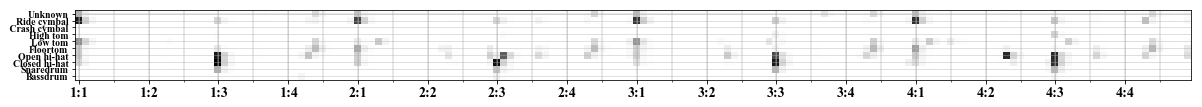

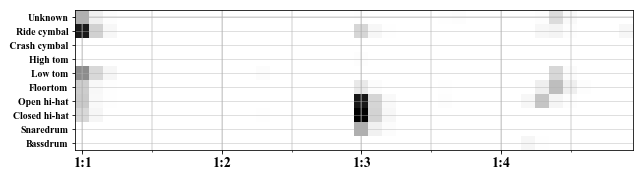

In [24]:
utils.reload(plot)
plot.single(x_result[0,1], figsize=(20,40))
plot.single(x_result[0,1, :40])

03 Traditional Pop/07 Lester Lee 133BPM ['07 Indie/06 Swing Funk 102BPM']
(7, 160, 10, 1)


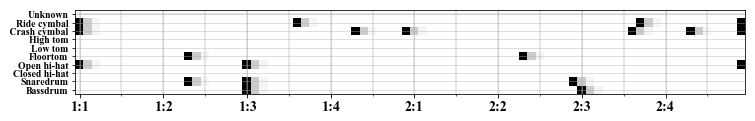

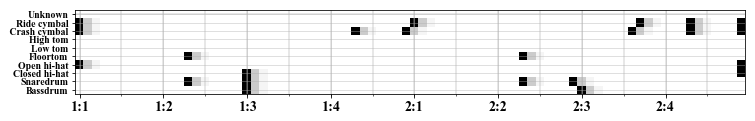

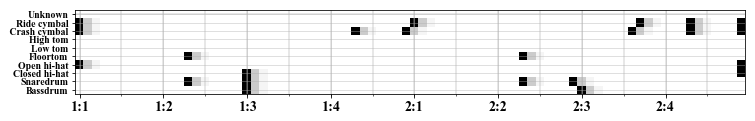

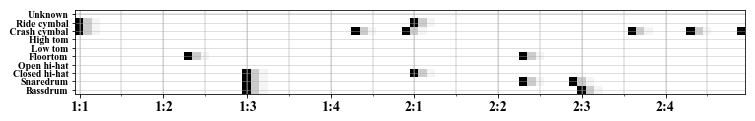

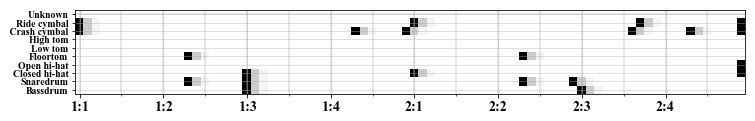

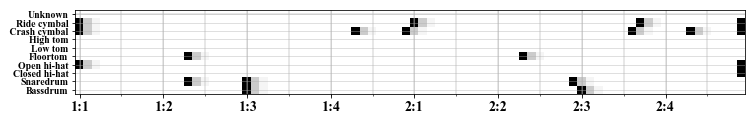

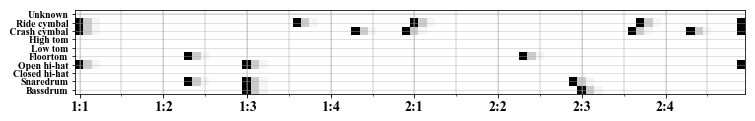

In [25]:
# utils.reload(midi.decode, midi.encode, midi)
utils.reload(plot)
c = context
k = list(db.keys())[2]
_,keys,i = utils.get(db[k], recursion_depth=0, i=0)
x = midi.decode.identity(c, x_result[i])
print(k, keys)
print(x.shape)
# utils.reload(plot)
for i in range(x.shape[0]):
    plot.single(x[i,:80], figsize=(12, 8)) # 8, 12

converting x to double-dict


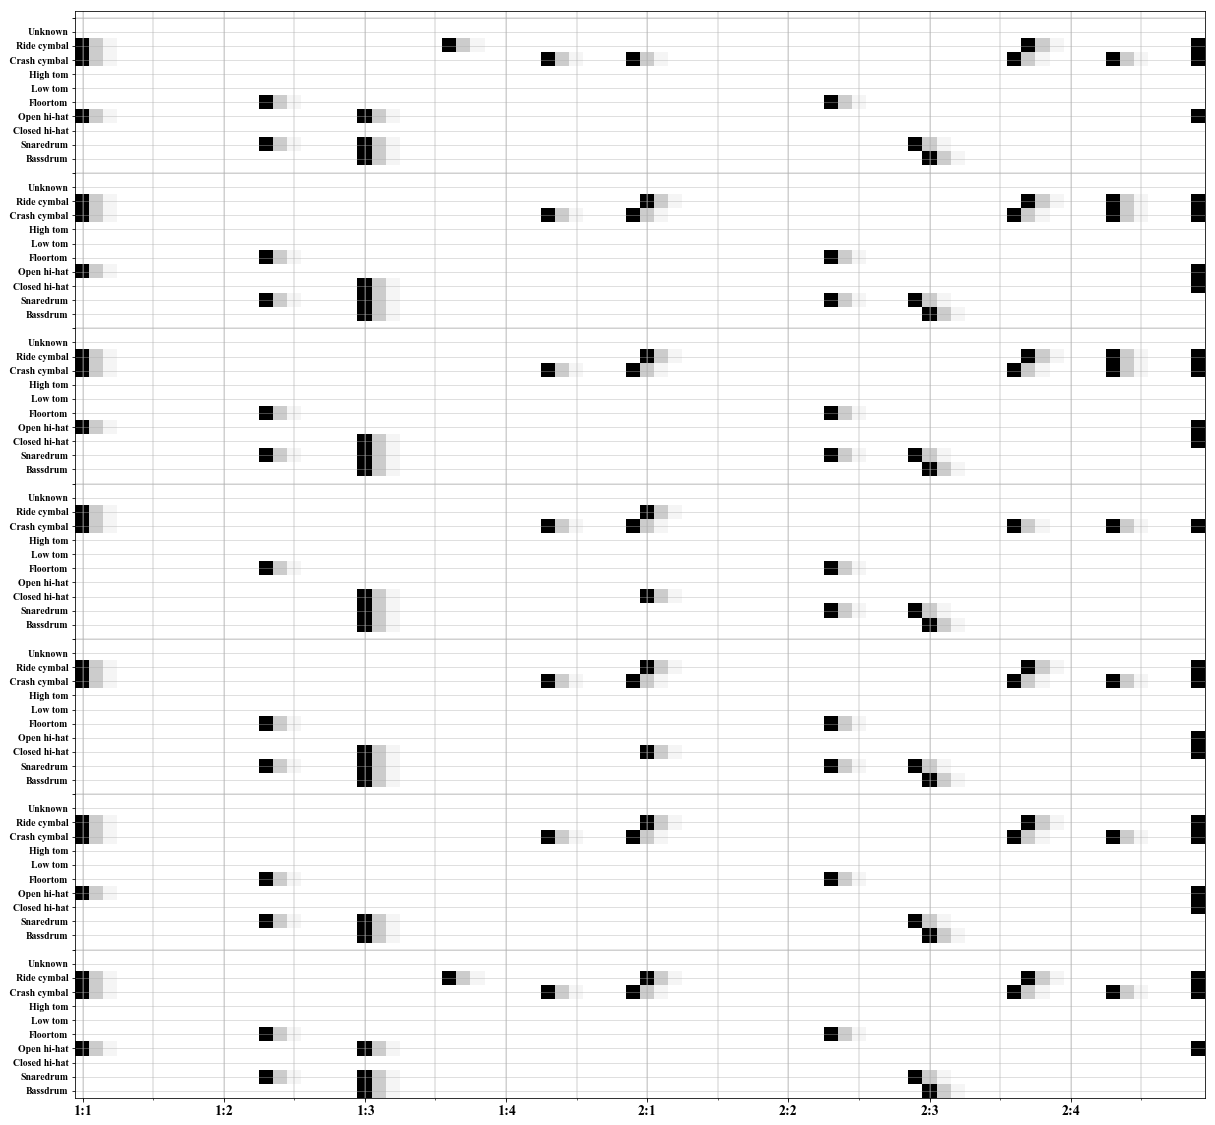

In [26]:
utils.reload(plot)
# plot.single(x[0,:40], figsize=(8, 12))
plot.multi(x, 80, figsize=(30,20), v=1)

In [32]:
utils.reload(midi, io)
def save_x_grid_search(x, i, grid):
    """x :: (samples, grid) + (midi.MultiTrack)
    """
    name = 'incr-transform'
    for grid_i, v in enumerate(grid):
        suffix = name + ('{id-%i-%i-%s}'%(i,grid_i,str(round(v,2))))
        fn = config.export_dir + suffix
        print(fn)
        mid = midi.decode.track(context, x[i,grid_i], v=0)
        io.export_midifile(mid, fn, name=suffix)

In [33]:
i, x_result.shape

(6, (355, 7, 160, 10, 1))

In [34]:
# utils.reload(io)
io.reset_midis_dir()
save_x_grid_search(x_result, i, grid)
# save_x_grid_search(x_result, 2, grid)
# save_x_grid_search(x_result, 3, grid)

../midis/incr-transform{id-6-0-0}
../midis/incr-transform{id-6-1-0.01}
../midis/incr-transform{id-6-2-0.1}
../midis/incr-transform{id-6-3-0.5}
../midis/incr-transform{id-6-4-1}


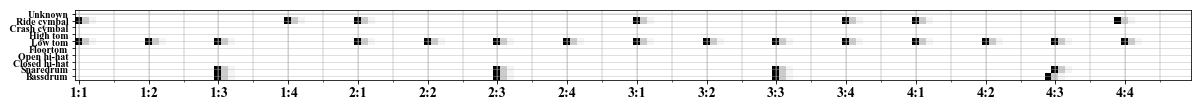

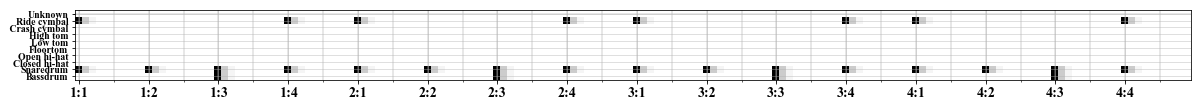

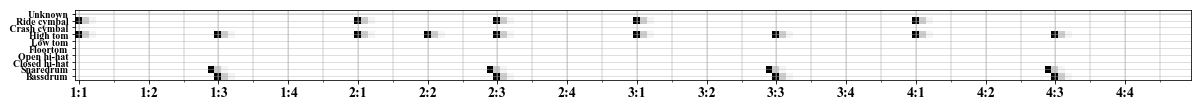

In [30]:
utils.reload(plot)
m = 160 
for j in [0, 2, -1]:
    plot.single(x_result[i,j,:m], figsize=(20,20), transform=context)

In [31]:
x_result.shape

(355, 7, 160, 10, 1)